<a href="https://colab.research.google.com/github/ozlemizgi/data_heartmedical/blob/main/6_haftaheartdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kütüphanelerin Çağırılması
import numpy as np
import pandas as pd

from sklearn import preprocessing

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Veriyi okumadan önce Sütun isimlerini içerisinde barındıran bir liste oluşturduk, kendi istediğimiz gibi isimlendirdik.
features = ["id" , "age" , "gender", "impluse" , "pressurehight" , "pressurelow" , "glucose" , "kcm" , "troponin" , "class"]

# Veriyi okurken names= features diyerek kendi veridiğimiz isimlere göre okuması için komut verdik.
heart = pd.read_csv("https://raw.githubusercontent.com/ozlemizgi/data_heartmedical/main/csv_result-Medicaldataset.csv", names= features, header=0)
heart.sample(11)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
227,228,70,0,79,150,85,146.0,4.290,0.061,positive
760,761,69,0,73,135,81,69.0,4.950,0.007,negative
1025,1026,40,1,95,101,76,167.0,3.570,0.029,positive
315,316,49,1,86,146,92,118.0,1.930,0.006,negative
275,276,68,1,87,135,84,108.0,3.760,0.012,negative
266,267,63,1,60,137,78,177.0,7.640,0.013,positive
440,441,52,1,96,147,84,93.0,1.600,0.005,negative
1260,1261,67,1,77,122,58,368.0,2.350,0.008,negative
585,586,52,1,78,123,66,86.0,0.529,0.038,positive
1271,1272,39,0,61,67,80,145.0,1.600,0.005,negative


In [3]:
# Veri setinin boyutları
print("Satır:", heart.shape[0], '\t', "Sütun:", heart.shape[1])

# bir Satır boşluk bırak
print("-"*80)

# Veri setinin sütun isimleri
print(heart.columns)

Satır: 1319 	 Sütun: 10
--------------------------------------------------------------------------------
Index(['id', 'age', 'gender', 'impluse', 'pressurehight', 'pressurelow',
       'glucose', 'kcm', 'troponin', 'class'],
      dtype='object')


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1319 non-null   int64  
 1   age            1319 non-null   int64  
 2   gender         1319 non-null   int64  
 3   impluse        1319 non-null   int64  
 4   pressurehight  1319 non-null   int64  
 5   pressurelow    1319 non-null   int64  
 6   glucose        1319 non-null   float64
 7   kcm            1319 non-null   float64
 8   troponin       1319 non-null   float64
 9   class          1319 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 103.2+ KB


In [5]:
heart["class"].value_counts()

positive    810
negative    509
Name: class, dtype: int64

In [6]:
# Veriyi istatistiksel açıdan inceleyelim.
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1319.0,660.000000,380.906813,1.000,330.500,660.000,989.5000,1319.0
age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
impluse,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
pressurehight,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
pressurelow,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
glucose,1319.0,146.634344,74.923045,35.000,98.000,116.000,169.5000,541.0
kcm,1319.0,15.274306,46.327083,0.321,1.655,2.850,5.8050,300.0
troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3


In [7]:
heart.sample(6)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
752,753,49,1,62,114,69,155.0,1.30,0.999,positive
547,548,56,0,89,141,79,94.0,5.82,0.007,positive
1297,1298,62,0,60,145,67,208.0,1.29,0.009,negative
1006,1007,60,1,81,118,66,87.0,3.96,0.029,positive
559,560,60,1,85,115,75,105.0,2.37,0.020,positive
443,444,35,1,78,149,77,92.0,1.51,0.007,negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


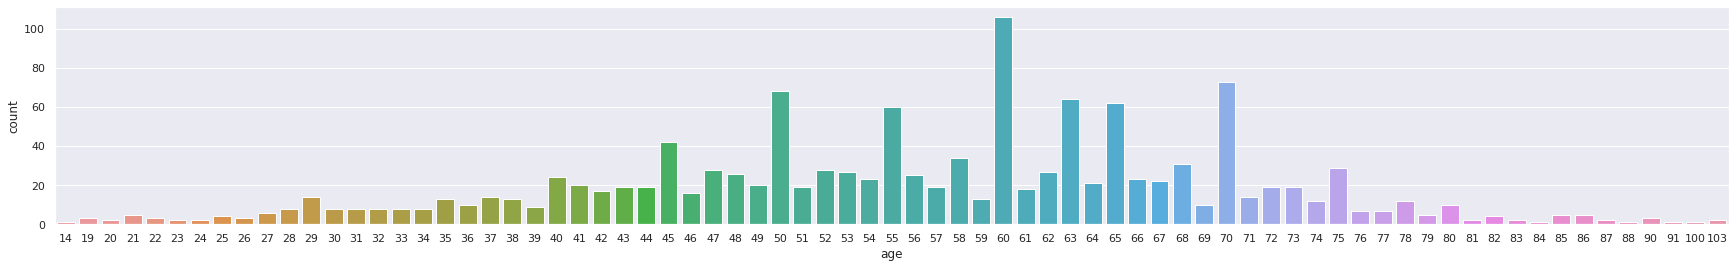

In [8]:
plt.subplots(figsize=(30,4))
sns.countplot(heart["age"])

In [9]:
heart['age_groupped'] = pd.cut(heart['age'],
                                 bins = [0,18,30,55,70,103])
heart.sample(8)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,age_groupped
168,169,46,0,76,169,95,152.0,2.190,0.006,negative,"(30, 55]"
701,702,44,1,77,153,76,98.0,3.690,1.440,positive,"(30, 55]"
230,231,62,1,76,154,86,159.0,1.160,0.003,negative,"(55, 70]"
496,497,50,1,61,117,78,276.0,4.390,2.340,positive,"(30, 55]"
544,545,56,1,70,113,55,105.0,0.726,0.003,negative,"(55, 70]"
538,539,52,0,89,130,80,181.0,1.950,0.020,positive,"(30, 55]"
454,455,65,1,55,115,68,106.0,2.390,0.454,positive,"(55, 70]"
743,744,49,1,85,119,76,35.0,5.680,0.050,positive,"(30, 55]"


In [25]:
heart['age_groupped']=pd.cut(heart['age'], 
                            bins=[0,18,30,55,70,103],
                            labels = ["çocuk", "genç", "orta yaş","yaşlı","çok yaşlı"])
heart.sample(10)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,age_groupped
697,698,51,1,91,121,82,185.0,2.020,0.023,0,orta yaş
416,417,54,1,74,145,85,93.0,23.110,0.177,0,orta yaş
74,75,52,1,66,94,63,115.0,0.718,0.219,0,orta yaş
1153,1154,70,0,73,85,44,96.0,2.020,5.110,0,yaşlı
911,912,74,1,51,143,75,96.0,2.050,0.015,0,çok yaşlı
1088,1089,68,1,65,112,58,134.0,7.470,0.022,0,yaşlı
323,324,75,0,70,134,58,217.0,2.820,0.015,0,çok yaşlı
938,939,69,1,74,156,74,135.0,1.590,0.299,0,yaşlı
1303,1304,55,0,80,117,83,200.0,0.780,0.052,0,orta yaş
185,186,66,1,69,129,73,215.0,300.000,0.005,0,yaşlı


In [27]:
heart=heart.drop(["age_groupped"], axis=1)
heart.sample(2)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1047,1048,55,0,96,105,70,66.0,300.0,0.003,0
997,998,86,1,60,154,81,112.0,300.0,1.790,0


In [45]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

###########################################################

def Random_Under_Sampler(heart):
    
    x = heart.drop(columns=['class'])
    y = heart['class']
    
    rus = RandomUnderSampler()
    x_rus, y_rus = rus.fit_resample(x, y)
    heart_rus = pd.concat([x_rus, y_rus], axis=1)
    
    print("RUS")
    print('original dataset shape:', Counter(y))
    print('Resample dataset shape', Counter(y_rus))
    
    return heart_rus

###########################################################

def Random_Over_Sampler(heart):
    
    x = heart.drop(columns=['class'])
    y = heart['class']
    
    ros = RandomOverSampler(random_state=42)
    x_ros, y_ros = ros.fit_resample(x, y)
    heart_ros = pd.concat([x_ros, y_ros], axis=1)
    
    print("ROS")
    print('Original dataset shape', Counter(y))
    print('Resample dataset shape', Counter(y_ros))
    
    return heart_ros

###########################################################

def TomekLinks_Under_Sampler(heart):
    
    x = heart.drop(columns=['class'])
    y = heart['class']
    
    tl = TomekLinks(sampling_strategy='majority')
    x_tl, y_tl = tl.fit_resample(x, y)
    heart_tl = pd.concat([x_tl, y_tl], axis=1)

    print("TL")
    print('Original dataset shape:', Counter(y))
    print('Resample dataset shape:', Counter(y_tl))
    
    return heart_tl

###########################################################

def SyntheticMinority_Over_Sampler(heart):
    
    x = heart.drop(columns=['class'])
    y = heart['class']
    
    smote = SMOTE()
    x_smote , y_smote = smote.fit_resample(x, y)
    heart_smote = pd.concat([x_smote , y_smote], axis=1)

    print("SMOTE")
    print('Original dataset shape:', Counter(y))
    print('Resampple dataset shape:', Counter(y_smote))
    
    return heart_smote

###########################################################

def NearMiss_Under_Sampler(heart):
    
    x = heart.drop(columns=['class'])
    y = heart['class']
    
    nm = NearMiss()
    x_nm, y_nm = nm.fit_resample(x, y)
    heart_nm = pd.concat([x_nm, y_nm], axis=1)
    
    print("NMUS")
    print('Original dataset shape:', Counter(y))
    print('Resample dataset shape:', Counter(y_nm))
    
    return heart_nm

In [46]:
heart_RUS = Random_Under_Sampler(heart)

RUS
original dataset shape: Counter({0: 810, 1: 509})
Resample dataset shape Counter({0: 509, 1: 509})


In [47]:
heart_ROS = Random_Over_Sampler(heart)

ROS
Original dataset shape Counter({0: 810, 1: 509})
Resample dataset shape Counter({1: 810, 0: 810})


In [48]:
heart_SMOTE = SyntheticMinority_Over_Sampler(heart)

SMOTE
Original dataset shape: Counter({0: 810, 1: 509})
Resampple dataset shape: Counter({1: 810, 0: 810})


In [49]:
heart_NMUS = NearMiss_Under_Sampler(heart)

NMUS
Original dataset shape: Counter({0: 810, 1: 509})
Resample dataset shape: Counter({0: 509, 1: 509})


In [50]:
heart_TL = TomekLinks_Under_Sampler(heart)

TL
Original dataset shape: Counter({0: 810, 1: 509})
Resample dataset shape: Counter({0: 659, 1: 509})


In [53]:
heartsets = [heart, heart_RUS, heart_ROS, heart_SMOTE, heart_NMUS, heart_TL]
titles = ["heart", "RUS", "ROS", "SMOTE", "NMUS", "TL"]

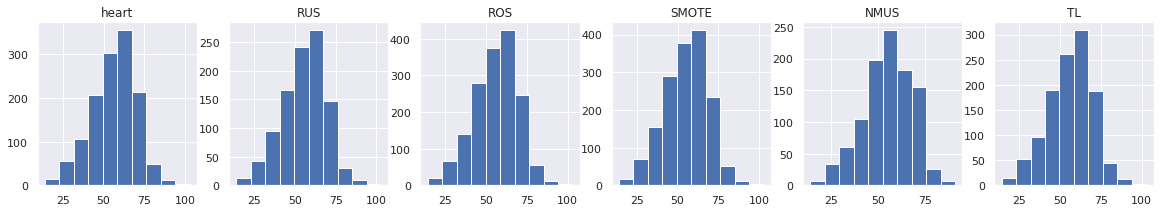

In [54]:
plt.figure(figsize=(20,3))

for i, heart in enumerate(heartsets):
    plt.subplot(1,6,i+1)
    heart["age"].hist()
    plt.title(titles[i])

plt.show()

In [55]:
x = heart.drop(columns=['kcm'])
y = heart['kcm']

In [56]:
## PCA'dan önce scaling işlemi uyguluyoruz.
scaler = preprocessing.StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std)
x_std.columns =  x.columns

x_std.sample(4)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,troponin,class
1140,1.649322,-1.507672,0.713473,-0.083402,0.259351,-1.009308,-0.914181,-0.290509,1.137847
629,0.135368,-0.574808,0.713473,0.004536,-0.005706,-0.797775,-0.642920,-0.287877,1.137847
836,0.749840,-0.072496,0.713473,0.246366,-0.043571,-0.586242,-0.724298,-0.275596,-0.878853
240,-1.025591,0.286298,0.713473,0.488195,1.925424,0.823975,-0.629356,0.741974,-0.878853


In [57]:
from sklearn.decomposition import PCA

PCA = PCA(n_components= 2)
PCA.fit(x_std)

X = PCA.transform(x_std)

print("varience ratio: ", PCA.explained_variance_ratio_)
print("sum of varience ratio: ", sum(PCA.explained_variance_ratio_))

varience ratio:  [0.17760011 0.15546482]
sum of varience ratio:  0.3330649336192052


In [58]:
X_pca = pd.DataFrame(X)
X_pca.columns =  ["Component 1", "Component 2"]
X_pca.head(5)

,Component 1,Component 2
0,1.406166,-0.686350
1,-1.999100,-0.161880
2,1.031122,-1.011160
3,-0.995499,0.884781
4,-0.825833,-0.859945


In [59]:
x.head(8)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,troponin,class
0,1,64,1,66,160,83,160.0,0.012,1
1,2,21,1,94,98,46,296.0,1.060,0
2,3,55,1,64,160,77,270.0,0.003,1
3,4,64,1,70,120,55,270.0,0.122,0
4,5,55,1,64,112,65,300.0,0.003,1
5,6,58,0,61,112,58,87.0,0.004,1
6,7,32,0,40,179,68,102.0,0.003,1
7,8,63,1,60,214,82,87.0,2.370,0
